# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression             # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
import seaborn as sns

titanic =  pd.read_csv('./data/titanicMachLearn.csv')

titanic

,SES,Fare,Survived
0,39,15,0
1,83,33,1
2,98,25,1
3,67,33,1
4,36,14,0
...,...,...,...
886,4,11,0
887,54,33,1
888,25,11,0
889,52,32,1


**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

In [168]:
# split data
X = titanic[['SES', 'Fare']]    # predictor matrix
y = titanic['Survived'] # target vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# train classifier ??
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# summarize performance of classifier
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 1.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



**Wait how could it predict with 100% accuracy? That doesn't seem possible...**

**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

In [172]:
print(type(titanic),type(X),type(y)) # this should be numpy.ndarray in order for scikit to work I think
titanic = np.asarray(titanic)
print(type(titanic),type(X),type(y))
# AHHH why won't it work?

X = titanic[['SES', 'Fare']]    # predictor matrix
y = titanic['Survived'] # target vector

survived = titanic['Survived']

# Create a scatter plot of the first two features with color indicating survival status
colors = ['red', 'blue']
survived = titanic['Survived'] # change this to be Survive == 1 and Survive == 0?

for i, color, target_name in zip (range(3), colors, survived):
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(titanic.X[0])  # SES
plt.ylabel(titanic.X[1])  # Fare
plt.legend(loc="upper right")
plt.title("Titanic Dataset: Fare vs Survival Status")
plt.show()

# It seems confused because it's bool?
# maybe can convert data type to be a word? so it's like the flower species?

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best based on the pair-pair plot we did in class (i.e. don't use the exact same variables we used in the in-class tutorial).

Compare the results with the results we got in class using the first two variables.

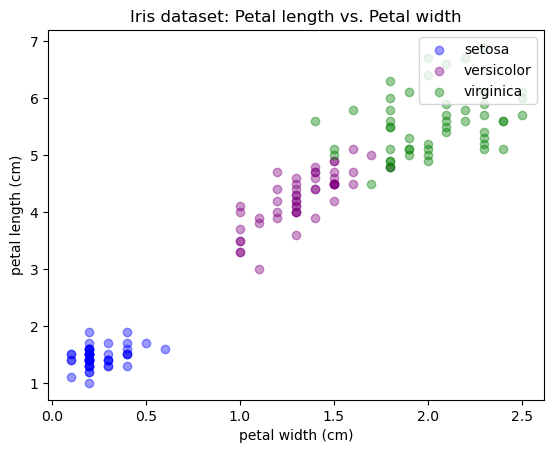

In [80]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# petal length and petal width are the variables i'm choosing!

X = iris.data     # predictor matrix
y = iris.target   # target vector

# Create a scatter plot of the first two features with color indicating category
colors = ['blue', 'purple', 'green']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X[y == i, 3], X[y == i, 2], 
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[3])  # petal length
plt.ylabel(iris.feature_names[2])  # petal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Petal length vs. Petal width")
plt.show()

I think using petal length and width actually better than using sepal length and width! It's especially good at differentiating setosa out from the other species. Even though versicolor and virginica overlap a little, it's not as much overlap as when using sepal length and width.